In [2]:
# 大小盘轮动
import pandas as pd
import matplotlib.pyplot as plt
import akshare as ak
import datetime

In [3]:
trade_rate = 0.6/10000

In [4]:
sh500 = ak.stock_zh_index_daily(symbol="sh000905")

In [5]:
sh50 = ak.stock_zh_index_daily(symbol="sh000016")

In [6]:
sh300 = ak.stock_zh_index_daily(symbol="sh000300")

In [7]:
sh1000 = ak.stock_zh_index_daily(symbol="sh000852")

In [8]:
sh300 = sh300[sh300["date"].map(str) > "2014"]

In [9]:
sh1000 = sh1000[sh1000["date"].map(str) > "2014"]

In [10]:
sh500 = sh500[sh500["date"].map(str) > "2014"]

In [11]:
sh50= sh50[sh50["date"].map(str) > "2014"]

In [12]:
sh300["big_amp"] = sh300["close"].pct_change()
sh1000["small_amp"] = sh1000["close"].pct_change()
sh500["middle_amp"] = sh500["close"].pct_change()

In [13]:
sh50["top_amp"] = sh50["close"].pct_change()

In [14]:
sh500

,date,open,high,low,close,volume,middle_amp
2182,2014-01-02,3823.316,3848.253,3813.806,3847.879,3080026000,NaN
2183,2014-01-03,3841.219,3843.360,3802.992,3816.316,3481756000,-0.008203
2184,2014-01-06,3806.585,3806.585,3709.909,3710.898,3451186400,-0.027623
2185,2014-01-07,3699.901,3740.717,3688.421,3733.662,2720862000,0.006134
2186,2014-01-08,3735.503,3768.503,3726.114,3738.205,3194344000,0.001217
...,...,...,...,...,...,...,...
4551,2023-09-22,5606.835,5700.323,5603.813,5698.817,10411898200,0.015485
4552,2023-09-25,5694.903,5699.154,5659.319,5666.664,9334071900,-0.005642
4553,2023-09-26,5661.032,5682.279,5646.654,5646.654,7430961500,-0.003531
4554,2023-09-27,5642.385,5701.508,5641.851,5674.345,8108624000,0.004904


In [15]:
sh300.rename(columns={"open":"big_open", "close": "big_close"}, inplace=True)
sh1000.rename(columns={"open":"small_open", "close": "small_close"}, inplace=True)
sh500.rename(columns={"open":"middle_open", "close": "middle_close"}, inplace=True)

In [16]:
sh50.rename(columns={"open":"top_open", "close": "top_close"}, inplace=True)

In [17]:
df = pd.merge(left=sh300[["date", "big_open", "big_close", "big_amp"]],
             right=sh1000[["date", "small_open", "small_close", "small_amp"]],
             left_on=["date"], right_on=["date"])
df

,date,big_open,big_close,big_amp,small_open,small_close,small_amp
0,2014-10-17,2443.222,2441.732,-0.001089,6118.979,6058.668,NaN
1,2014-10-20,2448.453,2454.711,0.005315,6068.776,6154.520,0.015821
2,2014-10-21,2453.406,2433.391,-0.008685,6153.020,6103.008,-0.008370
3,2014-10-22,2434.886,2418.641,-0.006062,6102.464,6027.510,-0.012371
4,2014-10-23,2415.440,2395.936,-0.009388,6009.840,5930.483,-0.016097
...,...,...,...,...,...,...,...
2178,2023-09-22,3672.640,3738.933,0.018105,5934.266,6054.928,0.019406
2179,2023-09-25,3738.062,3714.604,-0.006507,6051.821,6027.394,-0.004547
2180,2023-09-26,3711.711,3692.893,-0.005845,6017.302,5996.110,-0.005190
2181,2023-09-27,3694.961,3700.495,0.002059,5989.803,6034.061,0.006329


In [18]:
df = df.merge(sh500, on=["date"])
df

,date,big_open,big_close,big_amp,small_open,small_close,small_amp,middle_open,high,low,middle_close,volume,middle_amp
0,2014-10-17,2443.222,2441.732,-0.001089,6118.979,6058.668,NaN,4894.593,4914.660,4771.767,4860.732,8522981600,-0.009276
1,2014-10-20,2448.453,2454.711,0.005315,6068.776,6154.520,0.015821,4873.455,4929.473,4869.877,4929.160,6459660400,0.014078
2,2014-10-21,2453.406,2433.391,-0.008685,6153.020,6103.008,-0.008370,4929.230,4942.459,4878.180,4884.024,6781318400,-0.009157
3,2014-10-22,2434.886,2418.641,-0.006062,6102.464,6027.510,-0.012371,4881.512,4902.777,4821.194,4825.609,6136080800,-0.011960
4,2014-10-23,2415.440,2395.936,-0.009388,6009.840,5930.483,-0.016097,4815.123,4832.427,4732.762,4755.231,6501240000,-0.014584
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2178,2023-09-22,3672.640,3738.933,0.018105,5934.266,6054.928,0.019406,5606.835,5700.323,5603.813,5698.817,10411898200,0.015485
2179,2023-09-25,3738.062,3714.604,-0.006507,6051.821,6027.394,-0.004547,5694.903,5699.154,5659.319,5666.664,9334071900,-0.005642
2180,2023-09-26,3711.711,3692.893,-0.005845,6017.302,5996.110,-0.005190,5661.032,5682.279,5646.654,5646.654,7430961500,-0.003531
2181,2023-09-27,3694.961,3700.495,0.002059,5989.803,6034.061,0.006329,5642.385,5701.508,5641.851,5674.345,8108624000,0.004904


In [19]:
df

,date,big_open,big_close,big_amp,small_open,small_close,small_amp,middle_open,high,low,middle_close,volume,middle_amp
0,2014-10-17,2443.222,2441.732,-0.001089,6118.979,6058.668,NaN,4894.593,4914.660,4771.767,4860.732,8522981600,-0.009276
1,2014-10-20,2448.453,2454.711,0.005315,6068.776,6154.520,0.015821,4873.455,4929.473,4869.877,4929.160,6459660400,0.014078
2,2014-10-21,2453.406,2433.391,-0.008685,6153.020,6103.008,-0.008370,4929.230,4942.459,4878.180,4884.024,6781318400,-0.009157
3,2014-10-22,2434.886,2418.641,-0.006062,6102.464,6027.510,-0.012371,4881.512,4902.777,4821.194,4825.609,6136080800,-0.011960
4,2014-10-23,2415.440,2395.936,-0.009388,6009.840,5930.483,-0.016097,4815.123,4832.427,4732.762,4755.231,6501240000,-0.014584
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2178,2023-09-22,3672.640,3738.933,0.018105,5934.266,6054.928,0.019406,5606.835,5700.323,5603.813,5698.817,10411898200,0.015485
2179,2023-09-25,3738.062,3714.604,-0.006507,6051.821,6027.394,-0.004547,5694.903,5699.154,5659.319,5666.664,9334071900,-0.005642
2180,2023-09-26,3711.711,3692.893,-0.005845,6017.302,5996.110,-0.005190,5661.032,5682.279,5646.654,5646.654,7430961500,-0.003531
2181,2023-09-27,3694.961,3700.495,0.002059,5989.803,6034.061,0.006329,5642.385,5701.508,5641.851,5674.345,8108624000,0.004904


In [20]:
df = df.merge(sh50, on=["date"])

In [21]:
df2 = df[df["date"].map(str)>"2014"]
df2["big_cum"] = (df2["big_amp"] + 1).cumprod()
df2["small_cum"] = (df2["small_amp"] + 1).cumprod()
df2["middle_cum"] = (df2["middle_amp"] + 1).cumprod()
df2["top_cum"] = (df2["top_amp"] + 1).cumprod()

In [22]:
df

,date,big_open,big_close,big_amp,small_open,small_close,small_amp,middle_open,high_x,low_x,middle_close,volume_x,middle_amp,top_open,high_y,low_y,top_close,volume_y,top_amp
0,2014-10-17,2443.222,2441.732,-0.001089,6118.979,6058.668,NaN,4894.593,4914.660,4771.767,4860.732,8522981600,-0.009276,1608.983,1616.374,1592.698,1608.516,4325261200,-0.000136
1,2014-10-20,2448.453,2454.711,0.005315,6068.776,6154.520,0.015821,4873.455,4929.473,4869.877,4929.160,6459660400,0.014078,1613.801,1615.394,1606.124,1612.402,2867398200,0.002416
2,2014-10-21,2453.406,2433.391,-0.008685,6153.020,6103.008,-0.008370,4929.230,4942.459,4878.180,4884.024,6781318400,-0.009157,1612.095,1615.288,1599.861,1600.844,3036666200,-0.007168
3,2014-10-22,2434.886,2418.641,-0.006062,6102.464,6027.510,-0.012371,4881.512,4902.777,4821.194,4825.609,6136080800,-0.011960,1602.451,1612.749,1596.140,1597.125,2928230800,-0.002323
4,2014-10-23,2415.440,2395.936,-0.009388,6009.840,5930.483,-0.016097,4815.123,4832.427,4732.762,4755.231,6501240000,-0.014584,1595.819,1604.497,1584.616,1586.557,3397576800,-0.006617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2178,2023-09-22,3672.640,3738.933,0.018105,5934.266,6054.928,0.019406,5606.835,5700.323,5603.813,5698.817,10411898200,0.015485,2498.243,2550.983,2489.323,2550.983,3297857500,0.022135
2179,2023-09-25,3738.062,3714.604,-0.006507,6051.821,6027.394,-0.004547,5694.903,5699.154,5659.319,5666.664,9334071900,-0.005642,2548.888,2548.888,2526.068,2529.150,2556988100,-0.008559
2180,2023-09-26,3711.711,3692.893,-0.005845,6017.302,5996.110,-0.005190,5661.032,5682.279,5646.654,5646.654,7430961500,-0.003531,2526.352,2534.203,2512.027,2513.407,2334196400,-0.006225
2181,2023-09-27,3694.961,3700.495,0.002059,5989.803,6034.061,0.006329,5642.385,5701.508,5641.851,5674.345,8108624000,0.004904,2515.820,2538.684,2514.231,2520.140,2754083200,0.002679


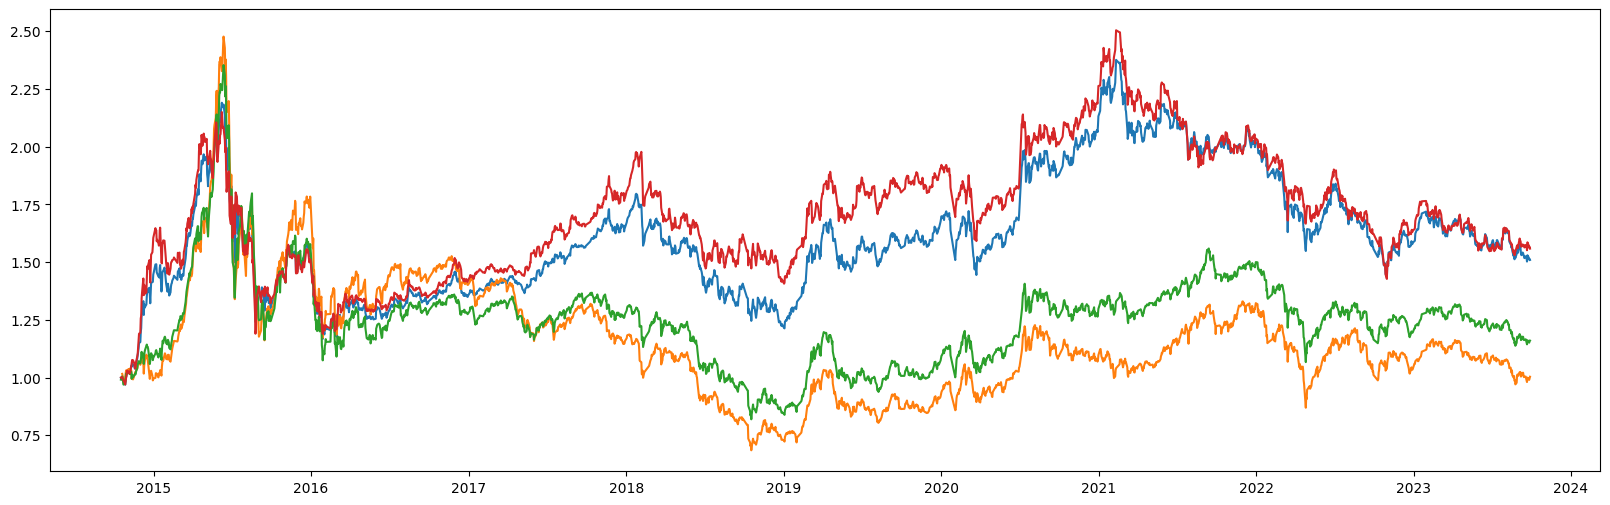

In [23]:
plt.rcParams["figure.figsize"] = (20,6)
plt.plot(df2["date"], df2["big_cum"], label=1)
plt.plot(df2["date"], df2["small_cum"], label=2)
plt.plot(df2["date"], df2["middle_cum"], label=3)
plt.plot(df2["date"], df2["top_cum"], label=3)

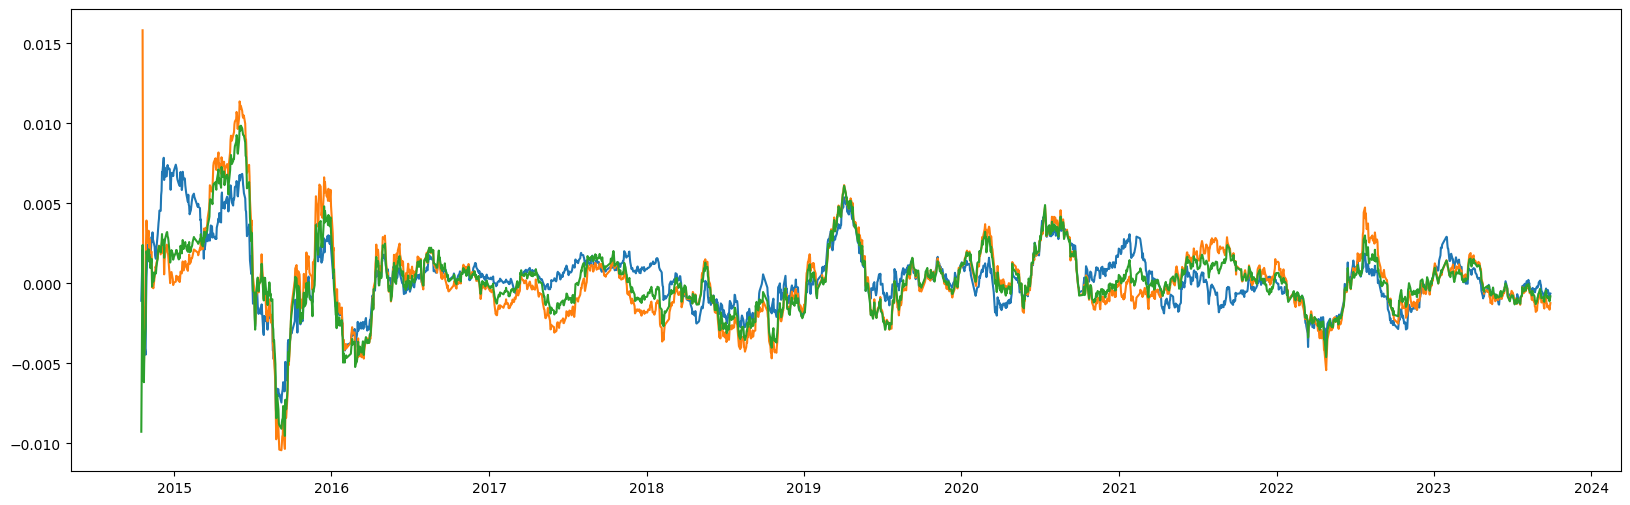

In [24]:
plt.plot(df2["date"], df2["big_amp"].rolling(60, min_periods=1).mean(), label=1)
plt.plot(df2["date"], df2["small_amp"].rolling(60, min_periods=1).mean(), label=2)
plt.plot(df2["date"], df2["middle_amp"].rolling(60, min_periods=1).mean(), label=3)

In [25]:
import math

df2["big_small"] = df2["big_amp"] - df2["small_amp"]
df2["big+small"] = abs(df2["big_amp"] * df2["big_amp"] + df2["small_amp"] * df2["small_amp"])
df2["big+small"] = df2["big+small"].map(math.sqrt)
df2["big2small"] = df2["big_small"]/df2["big+small"]

df2["mean"] =(df2["top_amp"] + df2["small_amp"] + df2["big_amp"] + df2["middle_amp"])/4
df2["big_mean"] = df2["big_amp"] - df2["mean"]
df2["top_mean"] = df2["top_amp"] - df2["mean"]
df2["small_mean"] = df2["small_amp"] - df2["mean"]
df2["middle_mean"] = df2["middle_amp"] - df2["mean"]

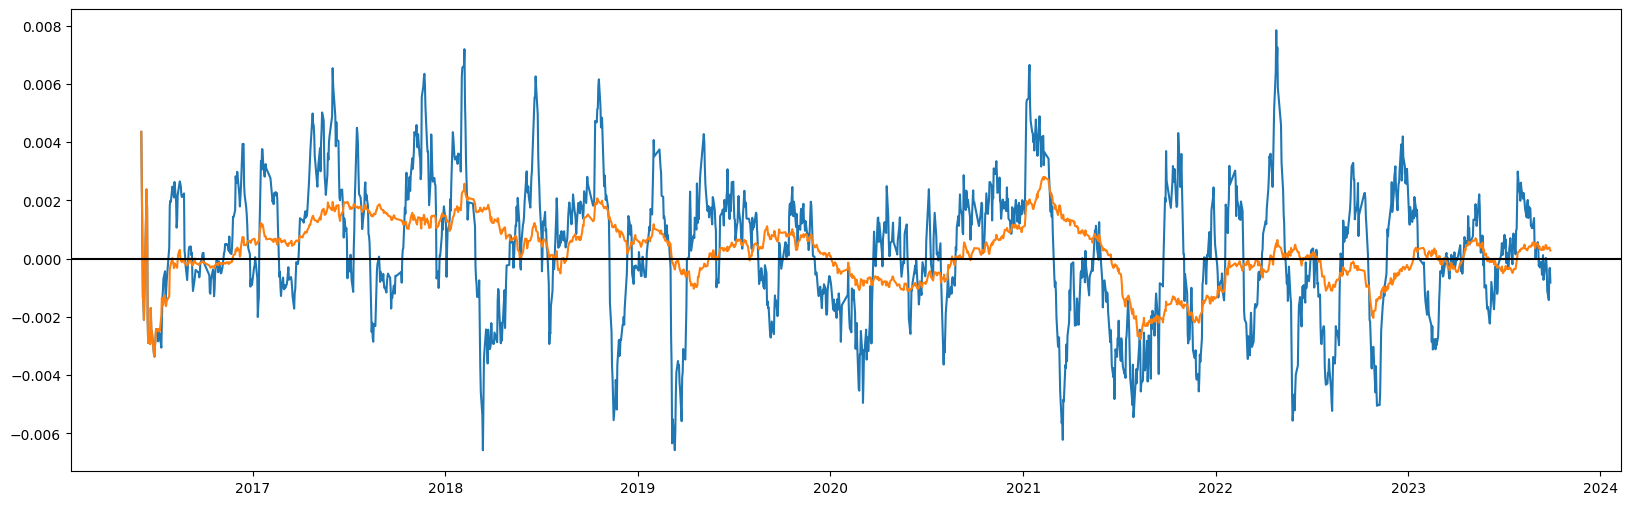

In [33]:
# plt.plot(df2["date"], df2["big_small"])
df3 = df2[400:]
plt.plot(df3["date"], df3["big_small"].rolling(20, min_periods=1).mean(), label=1)
plt.plot(df3["date"], df3["big_small"].rolling(120, min_periods=1).mean(), label=2)
plt.axhline(0, color="black")
# plt.plot(df2["date"], df2["big_small"].rolling(60, min_periods=1).mean(), label=2)

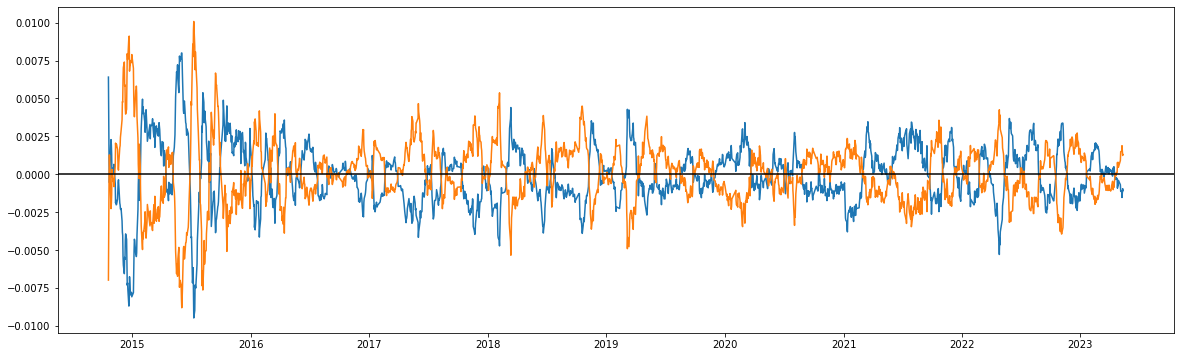

In [25]:
#plt.plot(df2["date"], df2["big_mean"].rolling(10, min_periods=1).mean(), label=1)
plt.plot(df2["date"], df2["small_mean"].rolling(20, min_periods=1).mean(), label=2)
# plt.plot(df2["date"], df2["middle_mean"].rolling(20, min_periods=1).mean(), label=2)
plt.plot(df2["date"], df2["top_mean"].rolling(20, min_periods=1).mean(), label=2)
plt.axhline(0, color="black")

In [26]:
df2["top_close"].rolling(5, min_periods=1).mean()

0       1608.51600
1       1610.45900
2       1607.25400
3       1604.72175
4       1601.08880
           ...    
2081    2685.30280
2082    2695.97620
2083    2695.20600
2084    2689.88020
2085    2679.03520
Name: top_close, Length: 2086, dtype: float64

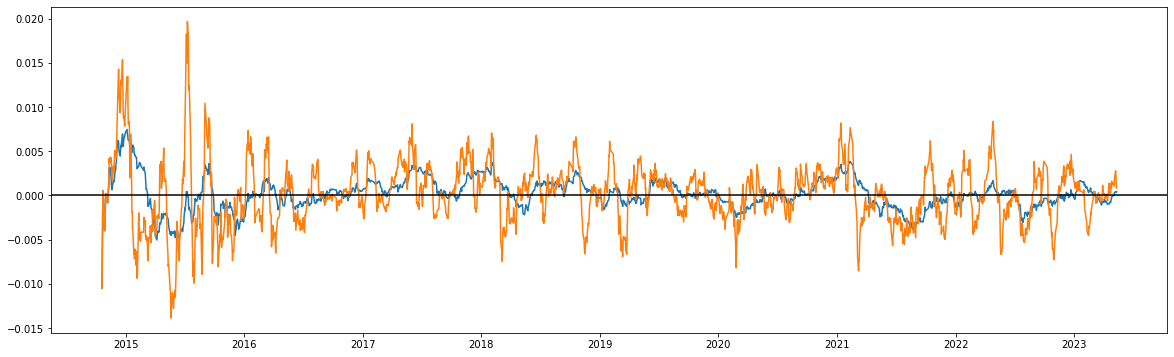

In [27]:
# plt.plot(df2["date"], df2["big_small"].rolling(5, min_periods=1).mean(), label=3)
# plt.plot(df2["date"], df2["big_small"].rolling(20, min_periods=1).mean(), label=1)
plt.plot(df2["date"], df2["big_small"].rolling(60, min_periods=1).mean(), label=2)
plt.plot(df2["date"], df2["big_small"].rolling(15, min_periods=1).mean(), label=2)
plt.axhline(0, color="black")


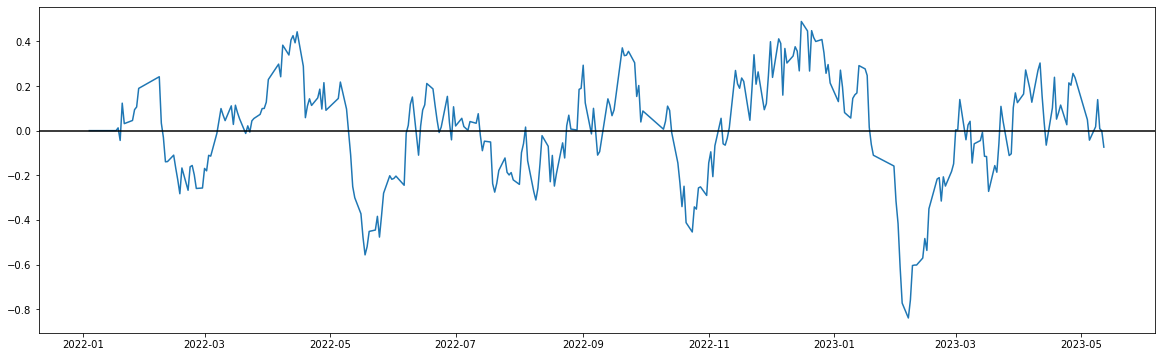

In [29]:
df3 =  df2.loc[df2["date"].map(str) >"2022", ]
plt.plot(df3["date"], df3["big2small"].rolling(10, min_periods=1).mean() - df3["big2small"].rolling(60, min_periods=1).mean(), label=2)
plt.axhline(0, color="black")


In [37]:
ak.stock.stock_hot_rank_em.stock_hot_rank_detail_em("sz000012")

,时间,排名,证券代码,新晋粉丝,铁杆粉丝
0,2023-01-15,1206,sz000012,0.3563,0.6437
1,2023-01-16,1171,sz000012,0.3620,0.6380
2,2023-01-17,1535,sz000012,0.3659,0.6341
3,2023-01-18,1327,sz000012,0.3592,0.6408
4,2023-01-19,1494,sz000012,0.3546,0.6454
...,...,...,...,...,...
115,2023-05-10,1049,sz000012,0.3292,0.6708
116,2023-05-11,1741,sz000012,0.3461,0.6539
117,2023-05-12,1947,sz000012,0.3533,0.6467
118,2023-05-13,2008,sz000012,0.3493,0.6507


In [ ]:
ak.

In [90]:
df2["big2small"]
aa = df2["big2small"].rolling(5, min_periods=1).mean()-df2["big2small"].rolling(180, min_periods=1).mean()
aa
df2


,date,big_open,big_close,big_amp,small_open,small_close,small_amp,middle_open,high_x,low_x,...,middle_cum,top_cum,big_small,big+small,big2small,mean,big_mean,top_mean,small_mean,middle_mean
0,2014-10-17,2443.222,2441.732,-0.001089,6118.979,6058.668,NaN,4894.593,4914.660,4771.767,...,0.990724,0.999864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-10-20,2448.453,2454.711,0.005315,6068.776,6154.520,0.015821,4873.455,4929.473,4869.877,...,1.004671,1.002279,-0.010505,0.016690,-0.629438,0.009407,-0.004092,-0.006992,0.006413,0.004670
2,2014-10-21,2453.406,2433.391,-0.008685,6153.020,6103.008,-0.008370,4929.230,4942.459,4878.180,...,0.995471,0.995095,-0.000316,0.012062,-0.026162,-0.008345,-0.000340,0.001177,-0.000025,-0.000812
3,2014-10-22,2434.886,2418.641,-0.006062,6102.464,6027.510,-0.012371,4881.512,4902.777,4821.194,...,0.983565,0.992783,0.006309,0.013776,0.457984,-0.008179,0.002117,0.005856,-0.004192,-0.003782
4,2014-10-23,2415.440,2395.936,-0.009388,6009.840,5930.483,-0.016097,4815.123,4832.427,4732.762,...,0.969220,0.986214,0.006710,0.018635,0.360074,-0.011672,0.002284,0.005055,-0.004426,-0.002913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990,2022-12-16,3931.232,3954.227,0.000566,6569.057,6519.436,-0.011840,6071.956,6087.458,6036.051,...,1.237783,1.671058,0.012406,0.011854,1.046633,-0.002783,0.003349,0.007680,-0.009057,-0.001972
1991,2022-12-19,3952.771,3893.221,-0.015428,6518.382,6390.770,-0.019736,6058.894,6081.444,5911.880,...,1.209984,1.644882,0.004308,0.025050,0.171961,-0.018322,0.002894,0.002657,-0.001414,-0.004137
1992,2022-12-20,3881.226,3829.017,-0.016491,6380.215,6341.583,-0.007697,5919.027,5920.987,5857.858,...,1.198071,1.615858,-0.008795,0.018199,-0.483254,-0.012919,-0.003572,-0.004725,0.005223,0.003074
1993,2022-12-21,3839.001,3830.538,0.000397,6341.215,6289.136,-0.008270,5879.272,5892.907,5819.668,...,1.191509,1.620791,0.008668,0.008280,1.046824,-0.002574,0.002972,0.005627,-0.005696,-0.002903


In [91]:
df2["big2small_roll"] = df2["big2small"].rolling(2, min_periods=1).mean()
df2["big2small_roll2"] = df2["big2small"].rolling(5, min_periods=1).mean() - df2["big2small"].rolling(20, min_periods=1).mean()
df2["big_roll"] = df2["big_close"].rolling(5, min_periods=1).mean()-df2["big_close"].rolling(20, min_periods=1).mean()
df2["small_roll"] = df2["small_close"].rolling(5, min_periods=1).mean()-df2["small_close"].rolling(20, min_periods=1).mean()
df2["style"] = "none"
df2.loc[df2["big2small_roll"] < -0.4,]



,date,big_open,big_close,big_amp,small_open,small_close,small_amp,middle_open,high_x,low_x,...,mean,big_mean,top_mean,small_mean,middle_mean,big2small_roll,big2small_roll2,big_roll,small_roll,style
1,2014-10-20,2448.453,2454.711,0.005315,6068.776,6154.520,0.015821,4873.455,4929.473,4869.877,...,0.009407,-0.004092,-0.006992,0.006413,0.004670,-0.629438,0.000000,0.000000,0.000000,none
5,2014-10-24,2397.848,2390.706,-0.002183,5930.571,5941.926,0.001930,4757.088,4800.361,4754.886,...,0.000464,-0.002647,-0.002442,0.001466,0.003623,-0.525732,0.000000,-3.842500,-4.529767,none
6,2014-10-27,2377.542,2368.832,-0.009150,5927.149,6006.838,0.010924,4762.517,4809.942,4739.330,...,-0.001444,-0.007706,-0.013406,0.012368,0.008743,-1.410128,0.037294,-13.348657,-29.897429,none
7,2014-10-28,2373.155,2416.653,0.020188,6021.653,6163.672,0.026109,4819.550,4925.085,4819.550,...,0.021716,-0.001528,-0.005152,0.004394,0.002286,-0.794072,-0.031007,-16.921650,-34.242325,none
14,2014-11-06,2505.167,2506.067,0.001046,6223.078,6289.192,0.009948,4992.723,5025.226,4959.732,...,0.003966,-0.002920,-0.004981,0.005981,0.001920,-0.843087,0.091665,56.413933,106.053333,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1963,2022-11-09,3750.782,3714.270,-0.009350,6694.404,6676.008,-0.002830,6140.542,6182.338,6118.729,...,-0.005497,-0.003852,-0.002123,0.002667,0.003308,-0.609722,0.121325,24.841500,196.802700,none
1969,2022-11-17,3821.271,3818.664,-0.004101,6685.943,6714.504,0.001860,6182.691,6217.205,6148.615,...,-0.001276,-0.002826,-0.003727,0.003135,0.003417,-0.693231,0.292060,115.550850,132.774800,none
1970,2022-11-18,3823.821,3801.569,-0.004477,6711.894,6658.401,-0.008355,6213.091,6251.107,6181.554,...,-0.005535,0.001058,0.000339,-0.002821,0.001424,-0.457256,0.144768,115.243050,124.454850,none
1971,2022-11-21,3769.627,3769.127,-0.008534,6622.603,6689.325,0.004644,6147.717,6196.647,6116.296,...,-0.004178,-0.004356,-0.008332,0.008823,0.003865,-0.473590,-0.331763,103.477350,126.842000,none


In [92]:
big_sum_list = []
large = 0
small = 0
for r in df2["big2small_roll"]:
    if r >0:
        large += r
        small =  0
        big_sum_list.append(large)
    else:
        small += r
        large = 0
        big_sum_list.append(small)
df2["big_sum"] = big_sum_list
        

In [93]:
import math
style_list = ["stop"]
r_last = 0
style = "big"
change = 0.0
sum_last = 0
for l in df2.iterrows():
    r = l[1]["big2small_roll"]
    sum_2 = l[1]["big_sum"]
    big_roll = l[1]["big_roll"]
    small_roll = l[1]["small_roll"]
    big_roll = 1
    small_roll = 1
    #     style = "nochange"
    if big_roll <0 and small_roll<0 and big_roll < big_roll_yes and small_roll < small_roll_yes:
        style = "stop"
    else:
#         if abs(sum_2) > 5 or abs(sum_last) > 5:
#             if sum_2 >0:
#                 style = "big"
#             else:
#                 style = "small"
        if r_last < - change and r > - change and style != "big":
            if abs(sum_last) > 3:
                style = "big"

        if r_last > change and r < change and style != "small":
            if abs(sum_last) > 3:
                style = "small"
                
        if r > 0.1:
            style = "big"
        if r <  -0.1:
            style = "small"
        
        if style == "stop":
            if r > 0:
                style = "big"
            else:
                style = "small"

    r_last = r
    sum_last = sum_2
    style_list.append(style)

    big_roll_yes = big_roll
    small_roll_yes = small_roll
    


# style_list
df2["style"] = style_list[:-1]   

df2

In [94]:
df2["amp_s"] = 0
df2.loc[df2["style"]=="big", "amp_s"] = df2["big_amp"]
df2.loc[df2["style"]=="small", "amp_s"] = df2["small_amp"]
df2.loc[df2["style"]=="stop", "amp_s"] = 0.0
yestoday_style =  df2["style"].shift(-1)
df2.loc[df2["style"] != yestoday_style, "amp_s"] -= 0.6/10000
df2

,date,big_open,big_close,big_amp,small_open,small_close,small_amp,middle_open,high_x,low_x,...,top_mean,small_mean,middle_mean,big2small_roll,big2small_roll2,big_roll,small_roll,style,big_sum,amp_s
0,2014-10-17,2443.222,2441.732,-0.001089,6118.979,6058.668,NaN,4894.593,4914.660,4771.767,...,NaN,NaN,NaN,NaN,NaN,0.00000,0.00000,stop,NaN,-0.000060
1,2014-10-20,2448.453,2454.711,0.005315,6068.776,6154.520,0.015821,4873.455,4929.473,4869.877,...,-0.006992,0.006413,0.004670,-0.629438,0.000000,0.00000,0.00000,big,NaN,0.005255
2,2014-10-21,2453.406,2433.391,-0.008685,6153.020,6103.008,-0.008370,4929.230,4942.459,4878.180,...,0.001177,-0.000025,-0.000812,-0.327800,0.000000,0.00000,0.00000,small,NaN,-0.008370
3,2014-10-22,2434.886,2418.641,-0.006062,6102.464,6027.510,-0.012371,4881.512,4902.777,4821.194,...,0.005856,-0.004192,-0.003782,0.215911,0.000000,0.00000,0.00000,small,0.215911,-0.012431
4,2014-10-23,2415.440,2395.936,-0.009388,6009.840,5930.483,-0.016097,4815.123,4832.427,4732.762,...,0.005055,-0.004426,-0.002913,0.409029,0.000000,0.00000,0.00000,big,0.624940,-0.009388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990,2022-12-16,3931.232,3954.227,0.000566,6569.057,6519.436,-0.011840,6071.956,6087.458,6036.051,...,0.007680,-0.009057,-0.001972,-0.055308,0.048626,70.22540,-30.63830,big,-0.055308,0.000566
1991,2022-12-19,3952.771,3893.221,-0.015428,6518.382,6390.770,-0.019736,6058.894,6081.444,5911.880,...,0.002657,-0.001414,-0.004137,0.609297,0.133856,51.97630,-68.69135,big,0.609297,-0.015428
1992,2022-12-20,3881.226,3829.017,-0.016491,6380.215,6341.583,-0.007697,5919.027,5920.987,5857.858,...,-0.004725,0.005223,0.003074,-0.155646,-0.042719,25.67130,-107.02585,big,-0.155646,-0.016551
1993,2022-12-21,3839.001,3830.538,0.000397,6341.215,6289.136,-0.008270,5879.272,5892.907,5819.668,...,0.005627,-0.005696,-0.002903,0.281785,-0.096216,-2.04875,-149.25940,small,0.281785,-0.008330


In [95]:
df2["strate_small_big"] = (df2["amp_s"] +1).cumprod()

/tmp/ipykernel_111434/169657495.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["big_cum"] = (df3["big_amp"] + 1).cumprod()
/tmp/ipykernel_111434/169657495.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["small_cum"]  = (df3["small_amp"] + 1).cumprod()
/tmp/ipykernel_111434/169657495.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

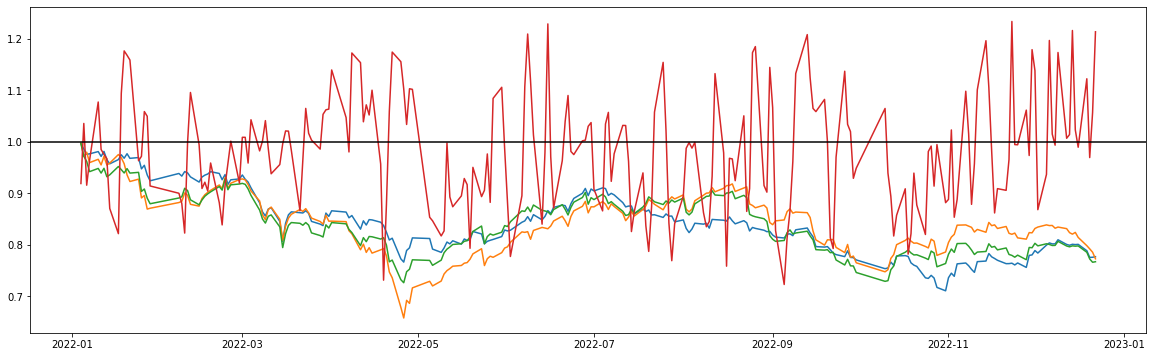

In [96]:
df3 =  df2.loc[df2["date"].map(str) >"2022", ]
# df3 =  df2
plt.rcParams["figure.figsize"] = (20,6)
df3["big_cum"] = (df3["big_amp"] + 1).cumprod()
df3["small_cum"]  = (df3["small_amp"] + 1).cumprod()
df3["strate_small_big"] = (df3["amp_s"] + 1).cumprod()
plt.plot(df3["date"], df3["big_cum"], label="big")
plt.plot(df3["date"], df3["small_cum"], label="small")
plt.plot(df3["date"], df3["strate_small_big"], label="merge")
plt.plot(df3["date"], df3["big2small_roll"]/5 + 1, label="aa")
plt.axhline(1, color="black")

In [97]:
df3.to_csv("date3.tsv", sep="\t")

(array([ 1.,  0.,  1.,  0.,  0.,  0.,  1.,  2.,  0.,  3.,  1.,  2.,  3.,
         4.,  2.,  4.,  3.,  2.,  7.,  5.,  9.,  7.,  9., 17.,  9., 10.,
        14., 20., 16., 20., 23., 21., 27., 23., 33., 20., 31., 34., 50.,
        36., 30., 43., 51., 55., 50., 53., 45., 44., 36., 47., 54., 56.,
        62., 38., 55., 44., 36., 48., 51., 40., 29., 43., 39., 40., 33.,
        28., 37., 31., 30., 24., 26., 17., 36., 24., 16., 12., 17., 13.,
        12., 10., 10.,  5.,  8.,  5.,  2.,  3.,  4.,  5.,  2.,  2.,  1.,
         1.,  2.,  1.,  0.,  1.,  2.,  0.,  0.,  1.]),
 array([-1.07926206, -1.05816482, -1.03706758, -1.01597034, -0.9948731 ,
        -0.97377585, -0.95267861, -0.93158137, -0.91048413, -0.88938689,
        -0.86828964, -0.8471924 , -0.82609516, -0.80499792, -0.78390068,
        -0.76280344, -0.74170619, -0.72060895, -0.69951171, -0.67841447,
        -0.65731723, -0.63621998, -0.61512274, -0.5940255 , -0.57292826,
        -0.55183102, -0.53073378, -0.50963653, -0.48853929, -0.467442

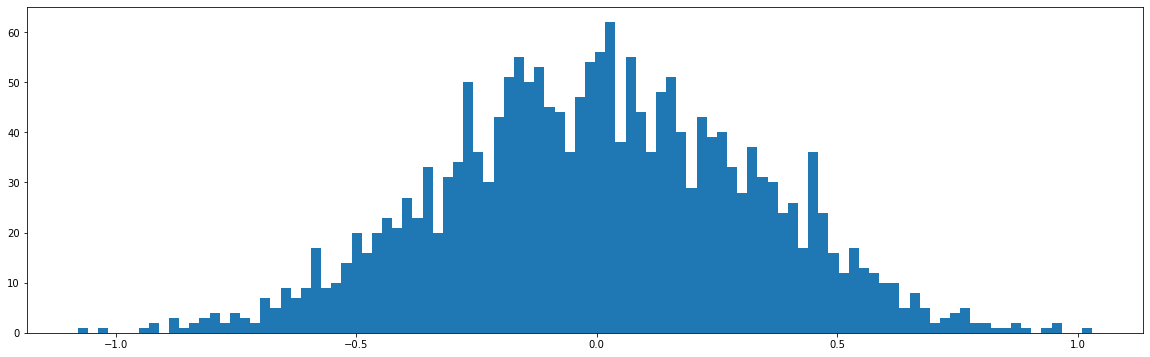

In [565]:
aa = df2["big2small"].rolling(5, min_periods=1).mean()-df2["big2small"].rolling(30, min_periods=1).mean()

plt.hist(aa, bins=100)

In [566]:
df2["strate_small_big"].iloc[-1]

1.8050039093282118

In [524]:
aa_mean = aa.mean()
aa_std = aa.std()
aa_mean, aa_std

(0.00031109983795790284, 0.32672170289333924)

In [525]:
from scipy import stats
b = stats.kstest(aa.values[10:], "norm", (aa_mean, aa_std))
aa.values
b

KstestResult(statistic=0.014746565402775191, pvalue=0.7801971265536731)

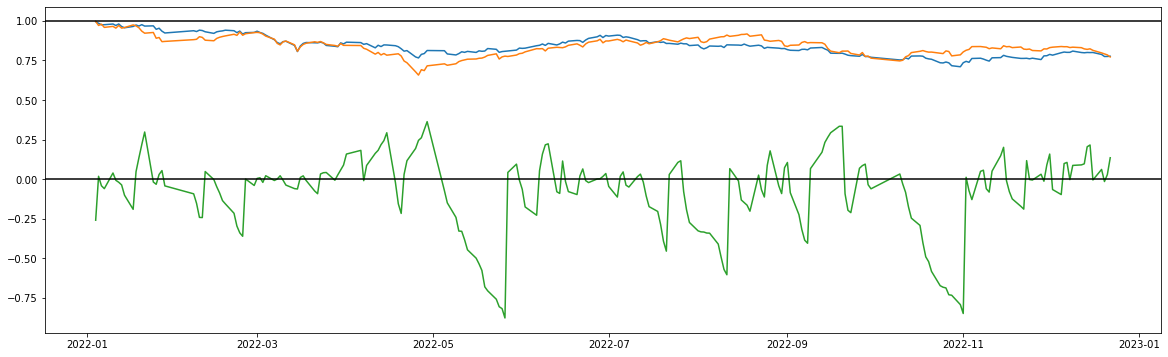

In [98]:
#plt.plot(df3["date"], df3["big2small"].rolling(10, min_periods=1).mean(), label=1)
# plt.plot(df3["date"], df3["big2small"].rolling(20, min_periods=1).mean(), label=1)
# plt.plot(df3["date"], df3["big2small"].rolling(180, min_periods=1).mean(), label=2)
plt.plot(df3["date"], df3["big_cum"], label="big")
plt.plot(df3["date"], df3["small_cum"], label="small")
plt.plot(df3["date"], df3["big_sum"]/10,label=2)
plt.axhline(1, color="black")
plt.axhline(0, color="black")

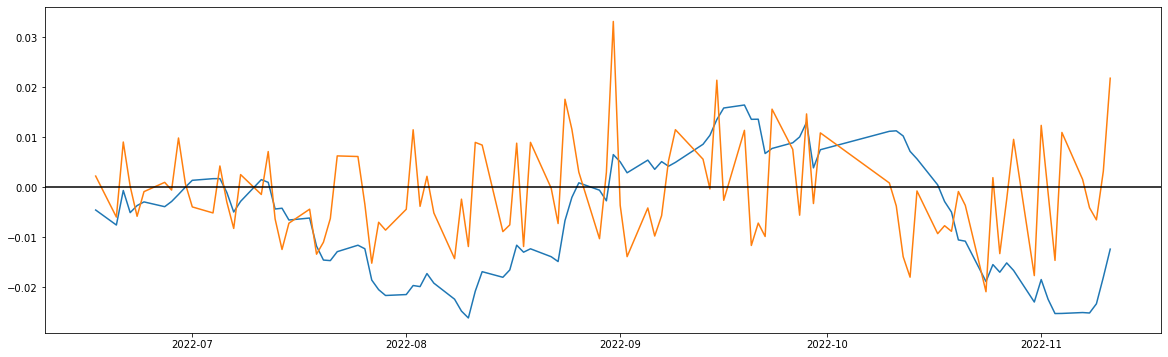

In [33]:
plt.plot(df2["date"][-100:], df2["big_small"].rolling(20, min_periods=1).mean()[-100:]*5, label=1)
plt.plot(df2["date"][-100:], df2["big_small"][-100:], label=2)
plt.axhline(0, color="black")

In [34]:
df.loc[df["big_amp"]>df["small_amp"], 'style'] = "big"
df.loc[df["big_amp"]<df["small_amp"], 'style'] = "small"

In [35]:
df["pos"] = df["style"].shift(1)
df

,date,big_open,big_close,big_amp,small_open,small_close,small_amp,middle_open,high_x,low_x,...,volume_x,middle_amp,top_open,high_y,low_y,top_close,volume_y,top_amp,style,pos
0,2014-10-17,2443.222,2441.732,-0.001089,6118.979,6058.668,NaN,4894.593,4914.660,4771.767,...,8522981600,-0.009276,1608.983,1616.374,1592.698,1608.516,4325261200,-0.000136,NaN,NaN
1,2014-10-20,2448.453,2454.711,0.005315,6068.776,6154.520,0.015821,4873.455,4929.473,4869.877,...,6459660400,0.014078,1613.801,1615.394,1606.124,1612.402,2867398200,0.002416,small,NaN
2,2014-10-21,2453.406,2433.391,-0.008685,6153.020,6103.008,-0.008370,4929.230,4942.459,4878.180,...,6781318400,-0.009157,1612.095,1615.288,1599.861,1600.844,3036666200,-0.007168,small,small
3,2014-10-22,2434.886,2418.641,-0.006062,6102.464,6027.510,-0.012371,4881.512,4902.777,4821.194,...,6136080800,-0.011960,1602.451,1612.749,1596.140,1597.125,2928230800,-0.002323,big,small
4,2014-10-23,2415.440,2395.936,-0.009388,6009.840,5930.483,-0.016097,4815.123,4832.427,4732.762,...,6501240000,-0.014584,1595.819,1604.497,1584.616,1586.557,3397576800,-0.006617,big,big
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,2022-11-07,3754.523,3775.297,0.002156,6713.731,6713.638,0.000595,6133.239,6166.191,6100.606,...,13809240900,0.001296,2452.005,2490.320,2449.630,2477.767,4044196100,0.003845,big,big
1962,2022-11-08,3773.661,3749.325,-0.006879,6707.013,6694.956,-0.002783,6139.890,6141.023,6095.445,...,10826753100,-0.001165,2476.653,2482.578,2442.923,2459.091,2729935200,-0.007537,small,big
1963,2022-11-09,3750.782,3714.270,-0.009350,6694.404,6676.008,-0.002830,6140.542,6182.338,6118.729,...,10476225000,-0.002189,2460.240,2470.407,2435.019,2440.352,2512532500,-0.007620,small,small
1964,2022-11-10,3685.827,3685.689,-0.007695,6638.516,6603.309,-0.010890,6085.285,6119.035,6061.808,...,11640192800,-0.005087,2422.011,2451.467,2414.351,2440.317,3820402100,-0.000014,big,small


In [36]:
df.loc[df["pos"] == "big", 'strategy_amp'] = df['big_amp']
df.loc[df["pos"] == "small", 'strategy_amp'] = df['small_amp']

In [37]:
df.loc[df["pos"] != df["pos"].shift(1), 'trade_time'] = df["date"]
import numpy as np
df["strate_amp_adjust"] = np.nan

In [38]:
df.loc[(df["trade_time"].isna() == False) & (df["pos"] == "big"), 'strate_amp_adjust'] = df["big_close"]/(df["big_open"] + trade_rate) -1
df.loc[(df["trade_time"].isna() == False) & (df["pos"] == "small"), 'strate_amp_adjust'] = df["small_close"]/(df["small_open"] + trade_rate) -1

In [39]:
df.loc[(df["trade_time"].shift(-1).isna() == False), 'strate_amp_adjust'] = (1 + df['strategy_amp']) * (1 + trade_rate) -1 

In [40]:
df

,date,big_open,big_close,big_amp,small_open,small_close,small_amp,middle_open,high_x,low_x,...,high_y,low_y,top_close,volume_y,top_amp,style,pos,strategy_amp,trade_time,strate_amp_adjust
0,2014-10-17,2443.222,2441.732,-0.001089,6118.979,6058.668,NaN,4894.593,4914.660,4771.767,...,1616.374,1592.698,1608.516,4325261200,-0.000136,NaN,NaN,NaN,2014-10-17,NaN
1,2014-10-20,2448.453,2454.711,0.005315,6068.776,6154.520,0.015821,4873.455,4929.473,4869.877,...,1615.394,1606.124,1612.402,2867398200,0.002416,small,NaN,NaN,2014-10-20,NaN
2,2014-10-21,2453.406,2433.391,-0.008685,6153.020,6103.008,-0.008370,4929.230,4942.459,4878.180,...,1615.288,1599.861,1600.844,3036666200,-0.007168,small,small,-0.008370,2014-10-21,-0.008128
3,2014-10-22,2434.886,2418.641,-0.006062,6102.464,6027.510,-0.012371,4881.512,4902.777,4821.194,...,1612.749,1596.140,1597.125,2928230800,-0.002323,big,small,-0.012371,NaN,-0.012311
4,2014-10-23,2415.440,2395.936,-0.009388,6009.840,5930.483,-0.016097,4815.123,4832.427,4732.762,...,1604.497,1584.616,1586.557,3397576800,-0.006617,big,big,-0.009388,2014-10-23,-0.008075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,2022-11-07,3754.523,3775.297,0.002156,6713.731,6713.638,0.000595,6133.239,6166.191,6100.606,...,2490.320,2449.630,2477.767,4044196100,0.003845,big,big,0.002156,2022-11-07,0.005533
1962,2022-11-08,3773.661,3749.325,-0.006879,6707.013,6694.956,-0.002783,6139.890,6141.023,6095.445,...,2482.578,2442.923,2459.091,2729935200,-0.007537,small,big,-0.006879,NaN,-0.006820
1963,2022-11-09,3750.782,3714.270,-0.009350,6694.404,6676.008,-0.002830,6140.542,6182.338,6118.729,...,2470.407,2435.019,2440.352,2512532500,-0.007620,small,small,-0.002830,2022-11-09,-0.002748
1964,2022-11-10,3685.827,3685.689,-0.007695,6638.516,6603.309,-0.010890,6085.285,6119.035,6061.808,...,2451.467,2414.351,2440.317,3820402100,-0.000014,big,small,-0.010890,NaN,-0.010830


In [41]:
df.loc[df["strate_amp_adjust"].isna(), "strate_amp_adjust"] = df["strategy_amp"]
df

,date,big_open,big_close,big_amp,small_open,small_close,small_amp,middle_open,high_x,low_x,...,high_y,low_y,top_close,volume_y,top_amp,style,pos,strategy_amp,trade_time,strate_amp_adjust
0,2014-10-17,2443.222,2441.732,-0.001089,6118.979,6058.668,NaN,4894.593,4914.660,4771.767,...,1616.374,1592.698,1608.516,4325261200,-0.000136,NaN,NaN,NaN,2014-10-17,NaN
1,2014-10-20,2448.453,2454.711,0.005315,6068.776,6154.520,0.015821,4873.455,4929.473,4869.877,...,1615.394,1606.124,1612.402,2867398200,0.002416,small,NaN,NaN,2014-10-20,NaN
2,2014-10-21,2453.406,2433.391,-0.008685,6153.020,6103.008,-0.008370,4929.230,4942.459,4878.180,...,1615.288,1599.861,1600.844,3036666200,-0.007168,small,small,-0.008370,2014-10-21,-0.008128
3,2014-10-22,2434.886,2418.641,-0.006062,6102.464,6027.510,-0.012371,4881.512,4902.777,4821.194,...,1612.749,1596.140,1597.125,2928230800,-0.002323,big,small,-0.012371,NaN,-0.012311
4,2014-10-23,2415.440,2395.936,-0.009388,6009.840,5930.483,-0.016097,4815.123,4832.427,4732.762,...,1604.497,1584.616,1586.557,3397576800,-0.006617,big,big,-0.009388,2014-10-23,-0.008075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,2022-11-07,3754.523,3775.297,0.002156,6713.731,6713.638,0.000595,6133.239,6166.191,6100.606,...,2490.320,2449.630,2477.767,4044196100,0.003845,big,big,0.002156,2022-11-07,0.005533
1962,2022-11-08,3773.661,3749.325,-0.006879,6707.013,6694.956,-0.002783,6139.890,6141.023,6095.445,...,2482.578,2442.923,2459.091,2729935200,-0.007537,small,big,-0.006879,NaN,-0.006820
1963,2022-11-09,3750.782,3714.270,-0.009350,6694.404,6676.008,-0.002830,6140.542,6182.338,6118.729,...,2470.407,2435.019,2440.352,2512532500,-0.007620,small,small,-0.002830,2022-11-09,-0.002748
1964,2022-11-10,3685.827,3685.689,-0.007695,6638.516,6603.309,-0.010890,6085.285,6119.035,6061.808,...,2451.467,2414.351,2440.317,3820402100,-0.000014,big,small,-0.010890,NaN,-0.010830


In [42]:
df.loc[(df["trade_time"].isna() == False) & (df["pos"] == "big")]


,date,big_open,big_close,big_amp,small_open,small_close,small_amp,middle_open,high_x,low_x,...,high_y,low_y,top_close,volume_y,top_amp,style,pos,strategy_amp,trade_time,strate_amp_adjust
4,2014-10-23,2415.440,2395.936,-0.009388,6009.840,5930.483,-0.016097,4815.123,4832.427,4732.762,...,1604.497,1584.616,1586.557,3397576800,-0.006617,big,big,-0.009388,2014-10-23,-0.008075
9,2014-10-30,2450.361,2468.925,0.007156,6248.470,6241.588,-0.000818,4988.972,5021.190,4975.786,...,1623.742,1602.553,1619.096,5007805600,0.006649,big,big,0.007156,2014-10-30,0.007576
13,2014-11-05,2516.870,2503.448,-0.003869,6222.944,6227.245,-0.000733,5004.891,5013.614,4976.131,...,1647.665,1632.716,1637.625,5181332800,-0.004861,small,big,-0.003869,2014-11-05,-0.003809
16,2014-11-10,2529.830,2565.730,0.025409,6236.195,6246.612,0.002962,4989.439,5031.197,4973.317,...,1689.054,1657.137,1689.024,8556244800,0.029690,big,big,0.025409,2014-11-10,0.014191
20,2014-11-14,2569.211,2581.093,0.000521,6002.051,6009.446,-0.002380,4901.139,4920.094,4862.392,...,1729.718,1706.835,1728.805,6124875600,0.001430,big,big,0.000521,2014-11-14,0.004625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953,2022-10-26,3633.311,3656.903,0.008118,6358.060,6491.692,0.021384,5871.077,6016.917,5871.077,...,2438.693,2392.735,2400.516,3658010900,0.002337,small,big,0.008118,2022-10-26,0.008179
1956,2022-10-31,3504.507,3508.703,-0.009213,6201.747,6292.619,0.008444,5745.078,5859.597,5743.555,...,2327.063,2288.011,2295.924,4152062500,-0.013330,small,big,-0.009213,2022-10-31,-0.009154
1958,2022-11-02,3620.369,3677.805,0.012006,6434.950,6524.514,0.013151,5925.651,6028.767,5916.061,...,2437.951,2375.508,2418.322,4229089000,0.009051,small,big,0.012006,2022-11-02,0.012067
1961,2022-11-07,3754.523,3775.297,0.002156,6713.731,6713.638,0.000595,6133.239,6166.191,6100.606,...,2490.320,2449.630,2477.767,4044196100,0.003845,big,big,0.002156,2022-11-07,0.005533


In [43]:
(df["strate_amp_adjust"] +1).cumprod()

0            NaN
1            NaN
2       0.991872
3       0.979661
4       0.971750
          ...   
1961    5.194577
1962    5.159151
1963    5.144974
1964    5.089253
1965    5.090169
Name: strate_amp_adjust, Length: 1966, dtype: float64

In [109]:
(df["small_amp"] +1).cumprod()

0            NaN
1       1.015821
2       1.007318
3       0.994857
4       0.978843
          ...   
1888    1.156908
1889    1.173542
1890    1.167797
1891    1.161080
1892    1.146937
Name: small_amp, Length: 1893, dtype: float64

In [110]:
(df["big_amp"] +1).cumprod()

0       0.998911
1       1.004220
2       0.995498
3       0.989464
4       0.980175
          ...   
1888    1.746584
1889    1.752500
1890    1.732968
1891    1.733858
1892    1.723389
Name: big_amp, Length: 1893, dtype: float64

In [2]:
stock_zh_index_5_min1_df = ak.index_zh_a_hist_min_em(symbol="000016", period="5")
stock_zh_index_5_min2_df = ak.index_zh_a_hist_min_em(symbol="000852", period="5")

In [3]:
stock_zh_index_5_min1_df

,时间,开盘,收盘,最高,最低,涨跌幅,涨跌额,成交量,成交额,振幅,换手率
0,2022-11-23 09:35:00,2524.18,2538.28,2538.72,2520.83,0.27,6.94,2773451,3.627503e+09,0.71,0.02
1,2022-11-23 09:40:00,2537.93,2535.80,2542.81,2532.74,-0.10,-2.48,2087035,2.412235e+09,0.40,0.02
2,2022-11-23 09:45:00,2535.38,2537.49,2538.23,2533.04,0.07,1.69,1335467,1.827144e+09,0.20,0.01
3,2022-11-23 09:50:00,2537.96,2531.05,2540.84,2531.05,-0.25,-6.44,1472745,2.009589e+09,0.39,0.01
4,2022-11-23 09:55:00,2531.07,2539.22,2540.25,2529.09,0.32,8.17,1155245,1.674428e+09,0.44,0.01
...,...,...,...,...,...,...,...,...,...,...,...
1531,2023-01-06 14:40:00,2714.79,2712.62,2715.44,2712.47,-0.08,-2.24,481270,8.483142e+08,0.11,0.00
1532,2023-01-06 14:45:00,2712.53,2715.33,2715.76,2712.52,0.10,2.71,574668,1.007478e+09,0.12,0.00
1533,2023-01-06 14:50:00,2715.45,2714.32,2715.68,2713.81,-0.04,-1.01,515738,1.027098e+09,0.07,0.00
1534,2023-01-06 14:55:00,2714.84,2714.43,2715.25,2714.04,0.00,0.11,596900,1.211057e+09,0.04,0.00


In [4]:
min1_df = stock_zh_index_5_min1_df[["时间", "收盘", "成交量"]]
min2_df = stock_zh_index_5_min2_df[["时间", "收盘", "成交量"]]

In [5]:
min1_df.rename(columns={"时间": "date", "收盘": "big_close", "成交量": "big_vol"}, inplace=True)
min2_df.rename(columns={"时间": "date", "收盘": "small_close", "成交量": "small_vol"}, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [6]:
import numpy as np
a= np.array(min2_df["small_vol"])
a = a.reshape(int(len(a)/48), 48)
a.mean()
avg = np.average(a, axis=0)

meana = np.tile(avg, 32)
min2_df["small_vol_m"] = min2_df["small_vol"]/meana

/tmp/ipykernel_340137/4140750310.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  min2_df["small_vol_m"] = min2_df["small_vol"]/meana


In [7]:
import numpy as np
a= np.array(min1_df["big_vol"])
a = a.reshape(int(len(a)/48), 48)
a.mean()
avg = np.average(a, axis=0)

meana = np.tile(avg, 32)
min1_df["big_vol_m"] = min1_df["big_vol"]/meana

/tmp/ipykernel_340137/2766524884.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  min1_df["big_vol_m"] = min1_df["big_vol"]/meana


In [8]:
df = pd.merge(left=min1_df[["date", "big_close", "big_vol_m"]],
             right=min2_df[["date", "small_close", "small_vol_m"]],
             left_on=["date"], right_on=["date"])

In [9]:
df["big_amp"] = df["big_close"].pct_change()
df["small_amp"] = df["small_close"].pct_change()

In [10]:
df

,date,big_close,big_vol_m,small_close,small_vol_m,big_amp,small_amp
0,2022-11-23 09:35:00,2538.28,1.266358,6558.68,0.864267,NaN,NaN
1,2022-11-23 09:40:00,2535.80,1.604926,6569.63,1.066382,-0.000977,0.001670
2,2022-11-23 09:45:00,2537.49,1.177689,6542.60,1.156775,0.000666,-0.004114
3,2022-11-23 09:50:00,2531.05,1.488287,6525.96,1.316109,-0.002538,-0.002543
4,2022-11-23 09:55:00,2539.22,1.224513,6539.50,1.053742,0.003228,0.002075
...,...,...,...,...,...,...,...
1531,2023-01-06 14:40:00,2712.62,0.977903,6500.24,0.824977,-0.000825,-0.000228
1532,2023-01-06 14:45:00,2715.33,1.029155,6503.94,0.924645,0.000999,0.000569
1533,2023-01-06 14:50:00,2714.32,0.827101,6500.81,0.903072,-0.000372,-0.000481
1534,2023-01-06 14:55:00,2714.43,0.859786,6499.84,0.911465,0.000041,-0.000149


In [11]:
df["big_cum"] = (df["big_amp"] + 1).cumprod()
df["small_cum"] = (df["small_amp"] + 1).cumprod()

In [12]:
df[500:]

,date,big_close,big_vol_m,small_close,small_vol_m,big_amp,small_amp,big_cum,small_cum
500,2022-12-07 11:15:00,2674.14,0.932471,6707.32,1.240224,0.001416,0.000427,1.053524,1.022663
501,2022-12-07 11:20:00,2672.21,0.690410,6707.03,1.200281,-0.000722,-0.000043,1.052764,1.022619
502,2022-12-07 11:25:00,2671.02,0.698810,6707.88,1.026754,-0.000445,0.000127,1.052295,1.022748
503,2022-12-07 11:30:00,2672.63,0.789469,6713.78,1.329341,0.000603,0.000880,1.052930,1.023648
504,2022-12-07 13:05:00,2681.57,1.474947,6719.02,1.156626,0.003345,0.000780,1.056452,1.024447
...,...,...,...,...,...,...,...,...,...
1531,2023-01-06 14:40:00,2712.62,0.977903,6500.24,0.824977,-0.000825,-0.000228,1.068684,0.991090
1532,2023-01-06 14:45:00,2715.33,1.029155,6503.94,0.924645,0.000999,0.000569,1.069752,0.991654
1533,2023-01-06 14:50:00,2714.32,0.827101,6500.81,0.903072,-0.000372,-0.000481,1.069354,0.991177
1534,2023-01-06 14:55:00,2714.43,0.859786,6499.84,0.911465,0.000041,-0.000149,1.069397,0.991029


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


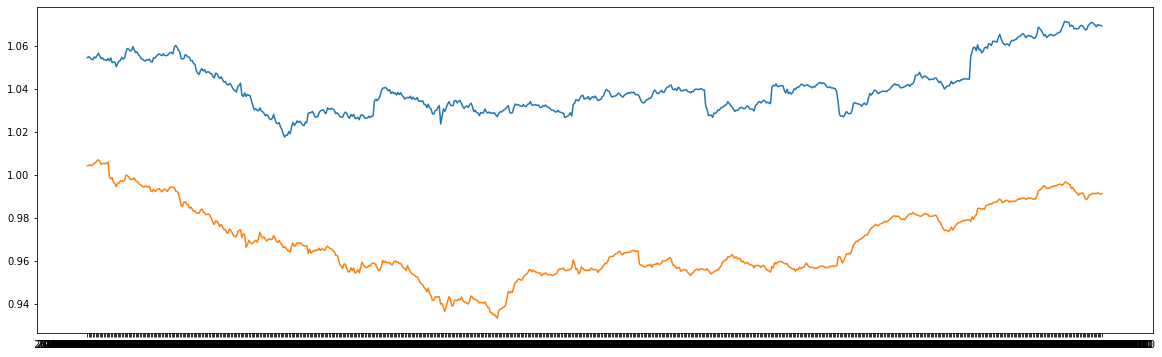

In [13]:
plt.rcParams["figure.figsize"] = (20,6)
df5 = df[800:]
plt.plot(df5["date"], df5["big_cum"], label=1)
plt.plot(df5["date"], df5["small_cum"], label=2)


In [14]:
import math
df["big_small"] = df["big_amp"] - df["small_amp"]
df["big+small"] = abs(df["big_amp"] * df["big_amp"] + df["small_amp"] * df["small_amp"])
df["big+small"] = df["big+small"].map(math.sqrt)
df["big2small"] = df["big_small"]/df["big+small"]

In [15]:
from datetime import datetime
df["date2"] = pd.to_datetime(df["date"])
# datetime.strptime(df["date"][0], '%Y-%m-%d %I:%M:%S')
df["date3"] = df["date"][1::20]
df["date3"]


0                       NaN
1       2022-11-23 09:40:00
2                       NaN
3                       NaN
4                       NaN
               ...         
1531                    NaN
1532                    NaN
1533                    NaN
1534                    NaN
1535                    NaN
Name: date3, Length: 1536, dtype: object

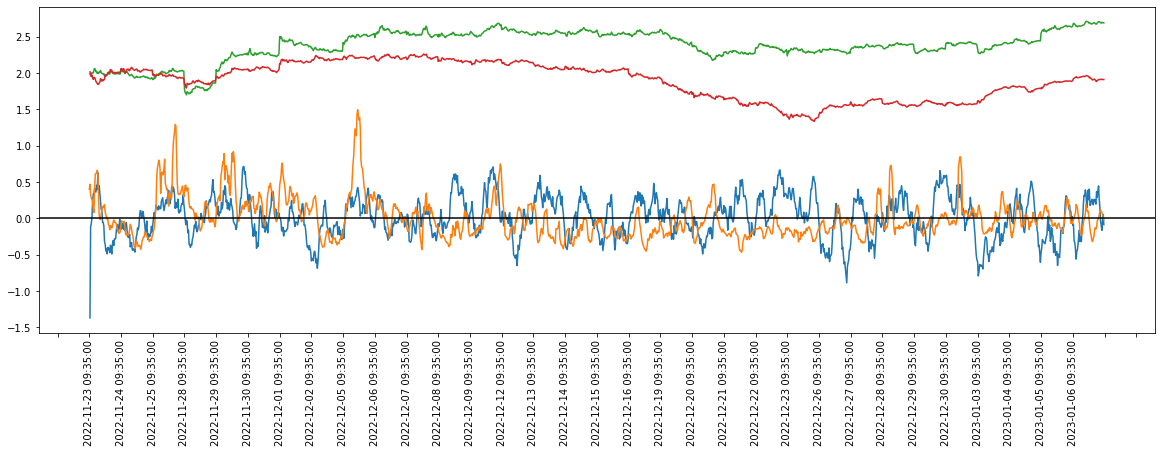

In [16]:
df22 = df[0:]
import matplotlib.ticker as ticker
fig, ax = plt.subplots(1,1)

ax.plot(df22["date"], df22["big2small"].rolling(12, min_periods=1).mean(), label=2)
ax.plot(df22["date"], (df22["big_vol_m"] - df22["small_vol_m"]).rolling(6, min_periods=1).mean(), label=2)
# ax.plot(df22["date"], df22["small_vol_m"].rolling(12, min_periods=1).mean(), label=2)
ax.plot(df22["date"], df22["big_cum"] * 10 -8 , label=1)
ax.plot(df22["date"], df22["small_cum"] * 10 -8  , label=2)
ax.axhline(0, color="black")
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=48))
plt.xticks(rotation=90)
plt.show()


In [151]:
type(df22["date"][0])

str

In [127]:
ak.stock_zh_a_hist_min_em(symbol="000001", period="5", start_date="20221110")

,时间,开盘,收盘,最高,最低,涨跌幅,涨跌额,成交量,成交额,振幅,换手率
0,2022-11-10 09:35:00,10.79,10.74,10.79,10.69,-1.38,-0.15,86916,93309416.0,0.92,0.04
1,2022-11-10 09:40:00,10.74,10.75,10.78,10.74,0.09,0.01,20770,22348090.0,0.37,0.01
2,2022-11-10 09:45:00,10.74,10.77,10.78,10.74,0.19,0.02,17257,18578814.0,0.37,0.01
3,2022-11-10 09:50:00,10.77,10.72,10.78,10.72,-0.46,-0.05,20499,22025691.0,0.56,0.01
4,2022-11-10 09:55:00,10.72,10.78,10.78,10.71,0.56,0.06,26713,28677327.0,0.65,0.01
...,...,...,...,...,...,...,...,...,...,...,...
1531,2022-12-23 14:40:00,12.97,13.00,13.00,12.97,0.15,0.02,15796,20514015.0,0.23,0.01
1532,2022-12-23 14:45:00,12.99,12.98,13.00,12.97,-0.15,-0.02,10737,13950008.0,0.23,0.01
1533,2022-12-23 14:50:00,12.97,12.98,12.98,12.96,0.00,0.00,8976,11645719.0,0.15,0.00
1534,2022-12-23 14:55:00,12.97,12.97,12.98,12.96,-0.08,-0.01,5621,7291155.0,0.15,0.00


In [134]:
b = ak.stock_zh_a_minute(symbol="sh510050", period='5', adjust="qfq")

In [138]:
b[b["day"] > "2022-11-30"]

,day,open,high,low,close,volume
159,2022-11-30 09:35:00,2.638,2.643,2.634,2.641,45858200
160,2022-11-30 09:40:00,2.642,2.651,2.641,2.651,32515521
161,2022-11-30 09:45:00,2.651,2.656,2.649,2.652,41425596
162,2022-11-30 09:50:00,2.652,2.663,2.651,2.661,76201100
163,2022-11-30 09:55:00,2.661,2.662,2.651,2.652,41026100
...,...,...,...,...,...,...
1018,2022-12-23 14:40:00,2.619,2.622,2.617,2.621,20773200
1019,2022-12-23 14:45:00,2.621,2.622,2.619,2.621,16777400
1020,2022-12-23 14:50:00,2.620,2.621,2.619,2.620,21088900
1021,2022-12-23 14:55:00,2.620,2.623,2.619,2.622,22393900


In [140]:
    start_date = "221203"
    if len(start_date) == 8:
        start_date = start_date[:4] + "-" + start_date[4:6] + "-" + start_date[6:]

In [141]:
start_date

'221203'

In [157]:
stock_zh_index_5_min1_df1 = ak.index_zh_a_hist_min_em(symbol="000016", period="5", start_date="20220926")

In [158]:
stock_zh_index_5_min1_df1

,时间,开盘,收盘,最高,最低,涨跌幅,涨跌额,成交量,成交额,振幅,换手率
0,2022-11-10 09:35:00,2422.01,2419.75,2422.45,2414.77,-0.84,-20.60,5026875,4.826871e+09,0.31,0.04
1,2022-11-10 09:40:00,2419.37,2417.27,2424.04,2416.79,-0.10,-2.48,1495116,2.336465e+09,0.30,0.01
2,2022-11-10 09:45:00,2417.37,2421.07,2421.55,2416.51,0.16,3.80,1077285,1.656021e+09,0.21,0.01
3,2022-11-10 09:50:00,2421.17,2416.92,2421.17,2414.35,-0.17,-4.15,839678,1.666912e+09,0.28,0.01
4,2022-11-10 09:55:00,2416.63,2425.56,2425.56,2414.37,0.36,8.64,2045931,1.698398e+09,0.46,0.02
...,...,...,...,...,...,...,...,...,...,...,...
1531,2022-12-23 14:40:00,2609.89,2612.49,2612.90,2609.47,0.09,2.29,306068,6.709530e+08,0.13,0.00
1532,2022-12-23 14:45:00,2612.49,2612.09,2613.80,2611.42,-0.02,-0.40,281802,5.932858e+08,0.09,0.00
1533,2022-12-23 14:50:00,2612.48,2613.50,2613.56,2611.68,0.05,1.41,392858,7.201037e+08,0.07,0.00
1534,2022-12-23 14:55:00,2613.36,2614.97,2614.97,2612.72,0.06,1.47,367192,7.797900e+08,0.09,0.00


In [159]:
stock_zh_index_5_min_df = ak.stock_zh_a_hist_min_em(symbol="000016", period="5", start_date="20221126")

In [160]:
stock_zh_index_5_min_df

,时间,开盘,收盘,最高,最低,涨跌幅,涨跌额,成交量,成交额,振幅,换手率
0,2022-11-28 09:35:00,4.88,4.85,4.88,4.82,-1.42,-0.07,13631,6609223.0,1.22,0.09
1,2022-11-28 09:40:00,4.85,4.84,4.85,4.83,-0.21,-0.01,14065,6808851.0,0.41,0.09
2,2022-11-28 09:45:00,4.84,4.81,4.84,4.79,-0.62,-0.03,13482,6486111.0,1.03,0.08
3,2022-11-28 09:50:00,4.81,4.81,4.81,4.78,0.00,0.00,7822,3752326.0,0.62,0.05
4,2022-11-28 09:55:00,4.81,4.81,4.82,4.80,0.00,0.00,6246,3001722.0,0.42,0.04
...,...,...,...,...,...,...,...,...,...,...,...
955,2022-12-23 14:40:00,4.60,4.61,4.61,4.59,0.22,0.01,2388,1098505.0,0.43,0.01
956,2022-12-23 14:45:00,4.61,4.61,4.61,4.60,0.00,0.00,1302,600019.0,0.22,0.01
957,2022-12-23 14:50:00,4.61,4.60,4.61,4.60,-0.22,-0.01,1040,479042.0,0.22,0.01
958,2022-12-23 14:55:00,4.60,4.61,4.62,4.60,0.22,0.01,1561,719289.0,0.43,0.01
